In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import io
import sklearn
import pandas as pd 
import glob
import cv2 
import time
import random
from sklearn.metrics import roc_curve, confusion_matrix
from PIL import Image
from tensorflow.keras import layers


In [11]:
allImages = []
allLabels = []

input_shape = (124,124)

parasite_path = r'C:\Users\danus\Downloads\malaria\cell_images\Parasitized'
uninfected_path = r'C:\Users\danus\Downloads\malaria\cell_images\Uninfected'

In [12]:
paths = [parasite_path, uninfected_path]

for path in paths:
    path2 = path + "/*.png"
    for file in glob.glob(path2):
        print(file)
        #load the images
        
        img = cv2.imread(file)
        
        if img is not None:
            resized = cv2.resize(img,input_shape,interpolation = cv2.INTER_AREA)
            allImages.append(resized)
            
            if path == parasite_path:
                allLabels.append(1)
            else:
                allLabels.append(0)   
            
            

C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_163.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_164.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_165.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_166.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_167.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_169.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_170.png
C:\Users\danus\Downloads\malaria\cell_images\Parasitized\C100P61ThinF_IMG

In [13]:
allImagesNP = np.array(allImages)
print(allImagesNP.shape)

(27558, 124, 124, 3)


In [14]:
allLabelsNP = np.array(allLabels)
print(allLabelsNP.shape)

(27558,)


In [15]:
np.save("c:/Users/danus/Downloads/malaria/allImagesNP.npy", allImagesNP)
np.save("c:/Users/danus/Downloads/malaria/allLabelsNP.npy", allLabelsNP)

In [17]:
#build a CNN model

allImages = np.load("c:/Users/danus/Downloads/malaria/allImagesNP.npy")
allLabels = np.load("c:/Users/danus/Downloads/malaria/allLabelsNP.npy")

In [18]:
allImages.shape,allLabels.shape

((27558, 124, 124, 3), (27558,))

In [19]:
input_shape = (124,124,3)
shpae = (124,124)


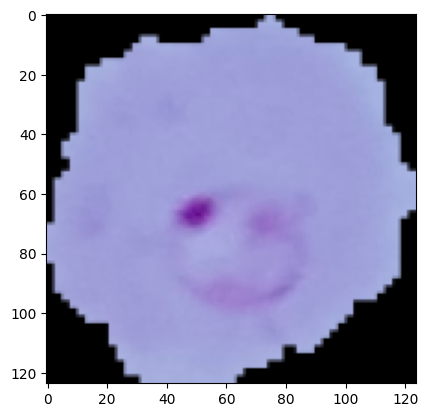

In [21]:
#first image

img = allImages[0]
label = allLabels[0]

plt.imshow(img)
plt.show()

In [22]:
#prepare all the data

allImagesForModel = allImages / 255.0

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(allImagesForModel,allLabels,test_size=0.2)


In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((22046, 124, 124, 3), (5512, 124, 124, 3), (22046,), (5512,))

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint

In [29]:
model = Sequential()

model.add(Conv2D(input_shape=input_shape,filters=16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters = 16,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 124, 124, 16)      448       
                                                                 
 conv2d_3 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 16)        0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                 

In [33]:
batch = 32
epochs = 10

stepsperepoch = np.ceil(len(x_train)/batch)
validationsteps = np.ceil(len(x_test)/batch)



In [34]:
model_file = "c:/Users/danus/Downloads/malaria/malaria_model.h5"

bmodel = ModelCheckpoint(model_file,monitor="val_accuracy",verbose=1,save_best_only=True)


In [35]:
history = model.fit(x_train,y_train,batch_size=batch,epochs=epochs,validation_data=(x_test,y_test),callbacks=[bmodel],steps_per_epoch=stepsperepoch,validation_steps=validationsteps)

Epoch 1/10

689/689 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.6140
Epoch 1: val_accuracy improved from -inf to 0.64205, saving model to c:/Users/danus/Downloads/malaria\malaria_model.h5


c:\Users\danus\miniconda3\envs\idk_gpu\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


689/689 [==============================] - 259s 369ms/step - loss: 0.6772 - accuracy: 0.6140 - val_loss: 0.6342 - val_accuracy: 0.6421
Epoch 2/10
689/689 [==============================] - ETA: 0s - loss: 0.6044 - accuracy: 0.6700
Epoch 2: val_accuracy improved from 0.64205 to 0.66128, saving model to c:/Users/danus/Downloads/malaria\malaria_model.h5
689/689 [==============================] - 231s 335ms/step - loss: 0.6044 - accuracy: 0.6700 - val_loss: 0.6127 - val_accuracy: 0.6613
Epoch 3/10
689/689 [==============================] - ETA: 0s - loss: 0.5666 - accuracy: 0.7087
Epoch 3: val_accuracy did not improve from 0.66128
689/689 [==============================] - 224s 326ms/step - loss: 0.5666 - accuracy: 0.7087 - val_loss: 0.6537 - val_accuracy: 0.6493
Epoch 4/10
689/689 [==============================] - ETA: 0s - loss: 0.4242 - accuracy: 0.8089
Epoch 4: val_accuracy improved from 0.66128 to 0.90239, saving model to c:/Users/danus/Downloads/malaria\malaria_model.h5
689/689 [===

In [36]:
#Testing the model 

model_file = "c:/Users/danus/Downloads/malaria/malaria_model.h5"

model = tf.keras.models.load_model(model_file)

In [37]:
input_shape = (124,124)

categories = ["Parasitized","Uninfected"]

def prepare_img(img):
    resized = cv2.resize(img,input_shape,interpolation = cv2.INTER_AREA)
    imgresult = np.expand_dims(resized,axis=0)
    imgresult = imgresult/255
    
    return imgresult

testimage = r"cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png"

img = cv2.imread(testimage)

imgformodel = prepare_img(img)

result = model.predict(imgformodel)

print(result)
    
    

1/1 [==============================] - 0s 342ms/step
[[0.9999989]]
